In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from fbprophet import Prophet
from google.colab import drive
!pip install nb_black -q

In [ ]:
crime_data = pd.read_csv('/content/Crimes_-_2001_to_Present.csv')

In [ ]:
crime_data.shape

(7317178, 22)

In [ ]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
crime_data.apply(lambda x: sum(x.isnull()),axis=0)

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8228
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614835
Community Area          613484
FBI Code                     0
X Coordinate             72481
Y Coordinate             72481
Year                         0
Updated On                   0
Latitude                 72481
Longitude                72481
Location                 72481
dtype: int64

In [ ]:
crime=crime_data[['ID','Case Number','Date','Block','IUCR','Primary Type','Description','Arrest','Domestic','Beat','FBI Code','Year','Updated On','X Coordinate','Y Coordinate','Longitude','Latitude']]

In [ ]:
crime["X Coordinate"].fillna(0, inplace = True)
crime["Y Coordinate"].fillna(0, inplace = True)
crime["Longitude"].fillna(0, inplace = True)
crime["Latitude"].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
crime.apply(lambda x: sum(x.isnull()),axis=0)

ID              0
Case Number     4
Date            0
Block           0
IUCR            0
Primary Type    0
Description     0
Arrest          0
Domestic        0
Beat            0
FBI Code        0
Year            0
Updated On      0
X Coordinate    0
Y Coordinate    0
Longitude       0
Latitude        0
dtype: int64

In [ ]:
crime[crime['Case Number'] != 'null']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,X Coordinate,Y Coordinate,Longitude,Latitude
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,False,True,924,08B,2015,02/10/2018 03:50:01 PM,1165074.0,1875917.0,-87.670000,41.815117
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,False,False,1511,06,2015,02/10/2018 03:50:01 PM,1138875.0,1904869.0,-87.765400,41.895080
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,False,True,631,06,2018,04/06/2019 04:04:43 PM,0.0,0.0,0.000000,0.000000
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),True,False,1412,18,2015,02/10/2018 03:50:01 PM,1152037.0,1920384.0,-87.716650,41.937406
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,False,True,1522,08A,2015,02/10/2018 03:50:01 PM,1141706.0,1900086.0,-87.755121,41.881903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317173,12354831,JE217180,04/26/2021 07:52:00 PM,027XX W 47TH ST,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,False,False,922,17,2021,05/03/2021 04:48:50 PM,0.0,0.0,0.000000,0.000000
7317174,12351684,JE213314,04/26/2021 07:20:00 PM,063XX N ALBANY AVE,0460,BATTERY,SIMPLE,False,False,2413,08B,2021,05/03/2021 04:48:50 PM,1154538.0,1941873.0,-87.706881,41.996323
7317175,12350253,JE210573,04/26/2021 12:25:00 PM,032XX W 63RD ST,0460,BATTERY,SIMPLE,False,False,823,08B,2021,05/03/2021 04:48:50 PM,1155925.0,1862672.0,-87.703915,41.778960
7317176,12349915,JE210931,04/26/2021 05:09:00 PM,053XX S HONORE ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,True,True,932,26,2021,05/03/2021 04:48:50 PM,1164923.0,1869299.0,-87.670741,41.796960


In [ ]:
crime_null = crime[crime.isna().any(axis=1)]

In [ ]:
crime_null

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,X Coordinate,Y Coordinate,Longitude,Latitude
4985088,7049552,NaN,07/30/2009 03:00:00 AM,058XX N PAULINA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,False,False,2012,14,2009,02/28/2018 03:56:25 PM,1164170.0,1938694.0,-87.671539,41.987401
5289723,7610078,NaN,07/16/2010 02:56:00 PM,005XX W VAN BUREN ST,0460,BATTERY,SIMPLE,True,False,111,08B,2010,02/10/2018 03:50:01 PM,1172646.0,1898435.0,-87.641559,41.876745
5995768,8475075,NaN,02/08/2012 10:00:00 PM,032XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1731,05,2012,05/04/2016 03:48:23 PM,0.0,0.0,0.000000,0.000000
7308215,7014449,NaN,07/10/2009 11:00:00 AM,082XX S HARPER AVE,0560,ASSAULT,SIMPLE,False,False,411,08A,2009,02/28/2018 03:56:25 PM,1187910.0,1850555.0,-87.587042,41.745008


In [ ]:
crime=crime[crime['ID'] != 8475075]

In [ ]:
crime.apply(lambda x: sum(x.isnull()),axis=0)

ID              0
Case Number     3
Date            0
Block           0
IUCR            0
Primary Type    0
Description     0
Arrest          0
Domestic        0
Beat            0
FBI Code        0
Year            0
Updated On      0
X Coordinate    0
Y Coordinate    0
Longitude       0
Latitude        0
dtype: int64

In [ ]:
minimum_X = crime['Latitude'].min()
minimum_Y = crime['Longitude'].min()
crime['Latitude'] = (crime['Latitude'] - minimum_X)
crime['Longitude'] = (crime['Longitude'] - minimum_Y)

In [ ]:
crime_data.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8228
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614835
Community Area          613484
FBI Code                     0
X Coordinate             72481
Y Coordinate             72481
Year                         0
Updated On                   0
Latitude                 72481
Longitude                72481
Location                 72481
dtype: int64

In [ ]:
crime_data.Date = pd.to_datetime(crime_data.Date, format="%m/%d/%Y %I:%M:%S %p")
crime_data.set_index("Date", inplace=True)

In [ ]:
import plotly.express as px


def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    figure = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq")
    figure.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    figure.update_layout(title_text=title)
    figure.show()


plot_counts(crime_data["Primary Type"], "Kind of Crimes")


In [ ]:
plot_counts(crime_data["Location Description"], "Location of Crimes")

In [ ]:
numberOfCases = pd.DataFrame(crime_data.resample("M").size(), columns=["Number of cases"])
n = 60
numberOfCases["Month"] = numberOfCases.index.month.astype(str)
numberOfCases["Year"] = numberOfCases.index.year.astype(str)
numberOfCases["Year-Month"] = numberOfCases["Year"].str.cat(numberOfCases["Month"].str.zfill(2), sep="-")
numberOfCases.head(n=n)

,Number of cases,Month,Year,Year-Month
Date,,,,
2001-01-31,38108,1,2001,2001-01
2001-02-28,33782,2,2001,2001-02
2001-03-31,40558,3,2001,2001-03
2001-04-30,40084,4,2001,2001-04
2001-05-31,41829,5,2001,2001-05
2001-06-30,41728,6,2001,2001-06
2001-07-31,44694,7,2001,2001-07
2001-08-31,44033,8,2001,2001-08
2001-09-30,41507,9,2001,2001-09


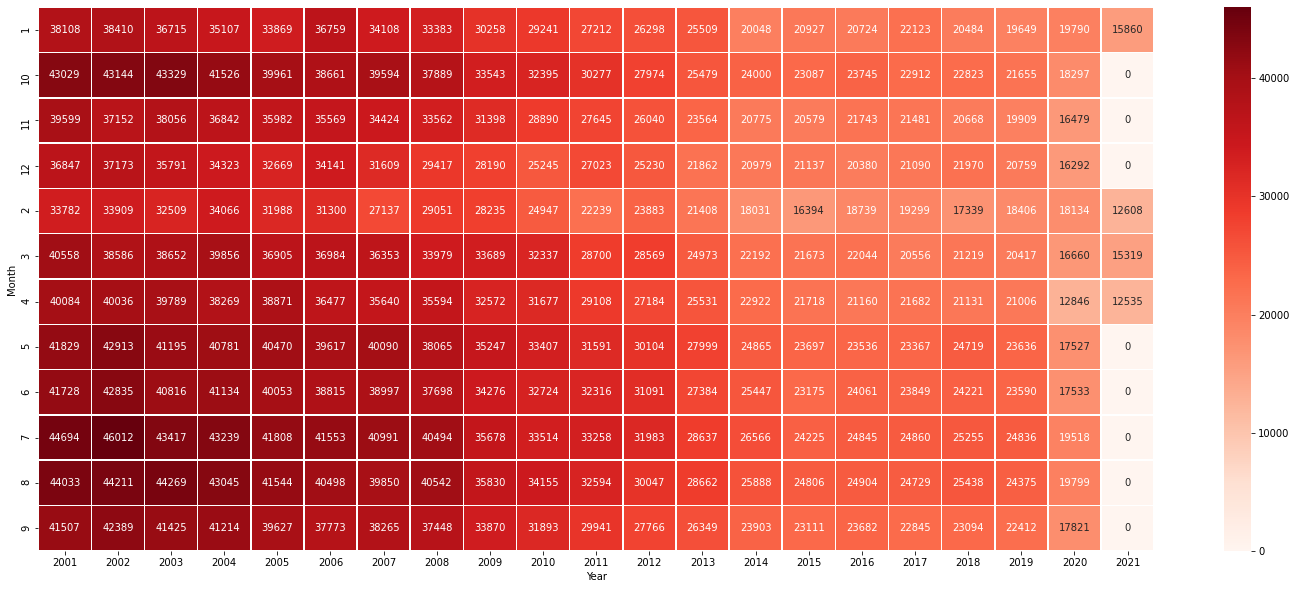

In [ ]:
numberOfCases_csm = numberOfCases[["Month", "Year", "Number of cases"]]
plt.figure(figsize=(25, 10))
sns.heatmap(
    numberOfCases_csm.pivot("Month", "Year", "Number of cases").fillna(0).astype(int),
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Reds",
)

In [ ]:
figure = px.bar(
    numberOfCases,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=2400,
)
figure.update_traces(texttemplate="%{text:.2s}", textposition="outside")
figure.update_layout(title_text='Crime counts per year-month in bars')
figure.show()

In [ ]:
figure = px.bar(
    numberOfCases,
    x="Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1500,
)
figure.update_traces(texttemplate="%{text:.2s}", textposition="outside")
figure.update_layout(title_text="Crime counts per year-month in stacked bars (Month)")
figure.show()

In [ ]:
figure = px.bar(
    numberOfCases,
    x="Year",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1500,
)
figure.update_traces(texttemplate="%{text:.2s}", textposition="outside")
figure.update_layout(title_text="Crime counts per year-month in stacked bars (Years)")

figure.show()

In [ ]:
crimesInChicago_data_model = crime_data.resample("M").size().reset_index()
crimesInChicago_data_model.columns = ["ds", "y"]
crimesInChicago_data_model

,ds,y
0,2001-01-31,38108
1,2001-02-28,33782
2,2001-03-31,40558
3,2001-04-30,40084
4,2001-05-31,41829
...,...,...
239,2020-12-31,16292
240,2021-01-31,15860
241,2021-02-28,12608
242,2021-03-31,15319


In [ ]:
crime_model = Prophet()
crime_model.fit(crimesInChicago_data_model)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futurePrediction = crime_model.make_future_dataframe(periods=300)
futureForecast = crime_model.predict(futurePrediction)
futureForecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,41687.009610,37140.871237,40520.380414,41687.009610,41687.009610,-2914.756457,-2914.756457,-2914.756457,-2914.756457,-2914.756457,-2914.756457,0.0,0.0,0.0,38772.253152
1,2001-02-28,41629.999977,34394.761908,37865.629490,41629.999977,41629.999977,-5572.934202,-5572.934202,-5572.934202,-5572.934202,-5572.934202,-5572.934202,0.0,0.0,0.0,36057.065775
2,2001-03-31,41566.882170,38663.209129,42158.775559,41566.882170,41566.882170,-1243.205216,-1243.205216,-1243.205216,-1243.205216,-1243.205216,-1243.205216,0.0,0.0,0.0,40323.676954
3,2001-04-30,41505.800421,38286.608858,41714.559786,41505.800421,41505.800421,-1539.220437,-1539.220437,-1539.220437,-1539.220437,-1539.220437,-1539.220437,0.0,0.0,0.0,39966.579984
4,2001-05-31,41442.682614,41307.807960,44762.003223,41442.682614,41442.682614,1485.572533,1485.572533,1485.572533,1485.572533,1485.572533,1485.572533,0.0,0.0,0.0,42928.255147


In [ ]:
import plotly.graph_objects as go

# Create random data with numpy

# Create traces
figure = go.Figure()
figure.add_trace(
    go.Scatter(
        x=futureForecast["ds"], y=futureForecast["yhat"], mode="lines", name="Predict Values"
    )
)
figure.add_trace(
    go.Scatter(x=futureForecast["ds"], y=futureForecast["trend"], mode="lines", name="Trend")
)
figure.add_trace(
    go.Scatter(
        x=crimesInChicago_data_model["ds"], y=crimesInChicago_data_model["y"], mode="lines+markers", name="Real Values",
    )
)
figure.update_layout(
    title_text="Comperating the real x predicted",
    yaxis_title="Crime counts",
    xaxis_title="Date",
)


figure.show()

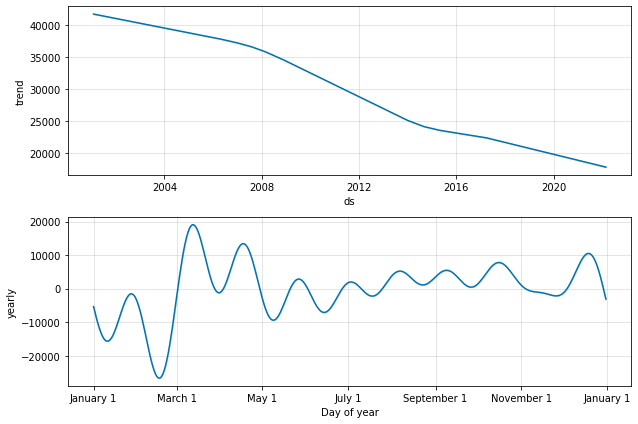

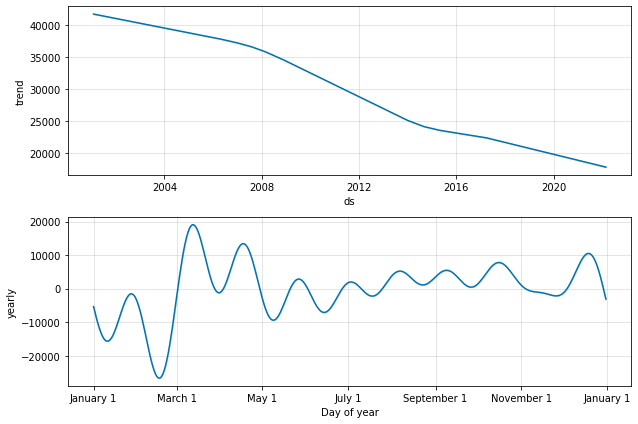

In [ ]:
crime_model.plot_components(futureForecast)